<a href="https://colab.research.google.com/github/amrutha-m-sajeev/NLP/blob/main/twitter_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re #regular expression(used for removing special character)
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
df

,0,1,2,3
0,ï»¿3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.columns=['Id','location','target','comments']
df

,Id,location,target,comments
0,ï»¿3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,Id,location,target,comments
0,ï»¿3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.isna().sum()

Id          0
location    0
target      0
comments    0
dtype: int64

In [ ]:
df['location'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


<Axes: xlabel='location', ylabel='count'>

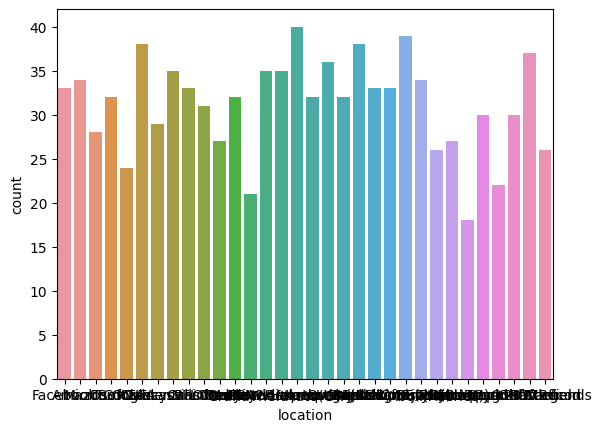

In [ ]:
sns.countplot(x=df['location'],data=df)

In [ ]:
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

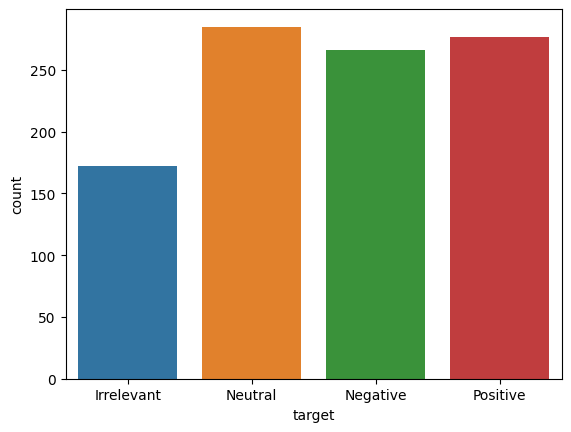

In [ ]:
sns.countplot(x=df['target'],data=df)

In [ ]:
df.drop(df.index[(df["target"]=='Irrelevant')],axis=0,inplace=True)
df

,Id,location,target,comments
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['target'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: target, dtype: int64

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Id,location,target,comments
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(['Id','location'],axis=1,inplace=True)
df

,target,comments
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Target=df['target']
# for i in Target:
#   if i=='postive':
#     print("postive:+1")
#   elif i=='Negative':
#     print("Negative:-1")
#   else :
#     print("Neutral:0")


In [ ]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,comments
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
tweet=df.comments
tweet


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: comments, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: comments, Length: 828, dtype: object

In [ ]:
str1='Wonderful @#$peacok 1234 !!'
str2=re.sub('[^a-aA-Z0-9]'," ",str1)#a-z(remove a-z character),A-z,6
print(str2)

W              a    1234   


In [ ]:
#remove special character
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-23-8627587b186a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: comments, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweet


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: comments, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweet=tweet.apply(lambda x : [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x: " ".join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: comments, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
train_data=vector.fit_transform(tweet)
print(train_data)

  (0, 734)	0.2456282916977699
  (0, 521)	0.2456282916977699
  (0, 3599)	0.19717097284763976
  (0, 878)	0.11802111433875656
  (0, 1055)	0.2456282916977699
  (0, 1184)	0.22139963227270484
  (0, 2088)	0.12503547156807654
  (0, 342)	0.2135997461023189
  (0, 907)	0.16343698819954885
  (0, 852)	0.2018385048310212
  (0, 2878)	0.2456282916977699
  (0, 607)	0.2456282916977699
  (0, 1915)	0.23145543449136263
  (0, 674)	0.2135997461023189
  (0, 412)	0.14270670271218175
  (0, 2389)	0.365996231282465
  (0, 576)	0.46291086898272527
  (1, 842)	0.4055823664694651
  (1, 3014)	0.4055823664694651
  (1, 2670)	0.3821800909185634
  (1, 1469)	0.4055823664694651
  (1, 3819)	0.36557591217188057
  (1, 2572)	0.3126902562590763
  (1, 3778)	0.26216072802580975
  (1, 2251)	0.24555654927912696
  :	:
  (825, 672)	0.22981061112100945
  (825, 1048)	0.2315686698425631
  (825, 3502)	0.21750175079084832
  (825, 3352)	0.2904718522758868
  (825, 2638)	0.17148706662740873
  (826, 1444)	0.5079831062080814
  (826, 3195)	0.4786

In [ ]:
test_data=df['target'].values
test_data

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,test_data,test_size=0.30,random_state=42)
x_train

<579x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 7609 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<249x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 3398 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
k_model=KNeighborsClassifier(n_neighbors=7)
nb_model=MultinomialNB()
sv_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier()
model=[k_model,nb_model,sv_model,d_model,r_model]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[60 11  8]
 [36 29 14]
 [40 17 34]]
0.4939759036144578
              precision    recall  f1-score   support

          -1       0.44      0.76      0.56        79
           0       0.51      0.37      0.43        79
           1       0.61      0.37      0.46        91

    accuracy                           0.49       249
   macro avg       0.52      0.50      0.48       249
weighted avg       0.52      0.49      0.48       249

****************************************************************************************************
[[47 25  7]
 [14 45 20]
 [15 23 53]]
0.5823293172690763
              precision    recall  f1-score   support

          -1       0.62      0.59      0.61        79
           0       0.48      0.57      0.52        79
           1       0.66      0.58      0.62        91

    accuracy                           0.58       249
   macro avg       0.59      0.58      0.58       249
weighted avg       0.59      0.58      0.58       249

*************************